In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
import numpy as np
from sklearn.metrics import mean_squared_error
from scipy.optimize import curve_fit
from scipy.optimize import fsolve
import statsmodels.api as sm
import warnings
warnings.filterwarnings('ignore')


In [2]:
plt.rcParams['figure.figsize'] = (20.0, 10.0)
plt.rcParams.update({'font.size': 22})

In [3]:
%matplotlib inline

In [4]:
covid_ng = pd.read_excel('data/records_covid19.xlsx', parse_dates=['Dates'],sheet_name='experimentation')
deathby_state = pd.read_csv('data/cases13062020.csv')

In [5]:
pd.set_option('display.max_columns', 60)

In [6]:
covid_ng.head()

Dates  Lagos  Abuja(FCT)  Kano  Ogun  Osun  Gombe  Katsina  \
0 2020-02-27 15:40:38      1           0     0     0     0      0        0   
1 2020-02-28 01:00:36      0           0     0     0     0      0        0   
2 2020-02-29 02:26:52      0           0     0     0     0      0        0   
3 2020-03-01 22:44:08      0           0     0     0     0      0        0   
4 2020-03-02 11:53:02      0           0     0     0     0      0        0   

   Borno  Edo  Oyo  Kwara  Akwa Ibom  Bauchi  Kaduna  Ekiti  Ondo  Delta  \
0      0    0    0      0          0       0       0      0     0      0   
1      0    0    0      0          0       0       0      0     0      0   
2      0    0    0      0          0       0       0      0     0      0   
3      0    0    0      0          0       0       0      0     0      0   
4      0    0    0      0          0       0       0      0     0      0   

   Rivers  Jigawa  Enugu  Niger  Abia  Zamfara  Sokoto  Benue  Anambra  \
0       0       0      0      0     0        0       0      0        0   
1       0       0      0      0     0        0       0      0        0   
2       0       0      0      0     0        0       0      0        0   
3       0       0      0      0     0        0       0      0        0   
4       0       0      0      0     0        0       0      0        0   

   Adamawa  Plateau  Imo  Kebbi  Kogi  Nasarawa  Taraba  Yobe  Bayelsa  \
0        0        0    0      0     0         0       0     0        0   
1        0        0    0      0     0         0       0     0        0   
2        0        0    0      0     0         0       0     0        0   
3        0        0    0      0     0         0       0     0        0   
4        0        0    0      0     0         0       0     0        0   

   Ebonyi  Cross River  Dischared/Revovered  Dealth  
0       0            0                    0       0  
1       0            0                    0       0  
2       0            0                    0       0  
3       0            0                    0       0  
4       0            0                    0       0

In [7]:
covid_ng.tail()

Dates  Lagos  Abuja(FCT)  Kano  Ogun  Osun  Gombe  Katsina  \
111 2020-06-10 15:52:49    201          85     5     4     0      0        0   
112 2020-06-11 15:48:24    345           0    23    48     0     47       12   
113 2020-06-12 15:44:03    229          65     1    21     0     27        0   
114 2020-06-13 15:42:48    195          50    42     9     0     17        3   
115 2020-06-14 15:43:41     68          35    46     6     0     73        0   

     Borno  Edo  Oyo  Kwara  Akwa Ibom  Bauchi  Kaduna  Ekiti  Ondo  Delta  \
111     14   16    0      0          0      10      14      0     4     22   
112      0   12   36      0          0      18       9      0     4     28   
113     42   28   35      6          0      10      10      0     8     18   
114      2   26   22      1          3       8      27      0     1     11   
115     13   36   16      0          0       0      17      0     1     13   

     Rivers  Jigawa  Enugu  Niger  Abia  Zamfara  Sokoto  Benue  Anambra  \
111       9       0      5      0     0        0       0      0        0   
112      51       5      0      0     0        0       0      0        7   
113      28       0      4      3    54        0       3      9        0   
114       0       3     12      0     0        0       0     12       11   
115       7       0      6      7    15        0       0      0        1   

     Adamawa  Plateau  Imo  Kebbi  Kogi  Nasarawa  Taraba  Yobe  Bayelsa  \
111        0        2    0      2     0        14       0     0        2   
112        0        0   31      4     0         1       0     0        0   
113        0       18    0      3     0         4       0     1        0   
114        0        0   21      4     0         9       0     2        0   
115        0        8    1      3     0        31       0     0        0   

     Ebonyi  Cross River  Dischared/Revovered  Dealth  
111       0            0                  145      17  
112       0            0                  143       5  
113       0            0                  397      12  
114      10            0                  210       8  
115       0            0                  119      13

In [8]:
covid_ng.shape

(116, 40)

In [9]:
covid_ng.columns

Index(['Dates', 'Lagos', 'Abuja(FCT)', 'Kano', 'Ogun', 'Osun', 'Gombe',
       'Katsina', 'Borno', 'Edo', 'Oyo', 'Kwara', 'Akwa Ibom', 'Bauchi',
       'Kaduna', 'Ekiti', 'Ondo', 'Delta', 'Rivers', 'Jigawa', 'Enugu',
       'Niger', 'Abia', 'Zamfara', 'Sokoto', 'Benue', 'Anambra', 'Adamawa',
       'Plateau', 'Imo', 'Kebbi', 'Kogi', 'Nasarawa', 'Taraba', 'Yobe',
       'Bayelsa', 'Ebonyi', 'Cross River', 'Dischared/Revovered', 'Dealth'],
      dtype='object')

In [10]:
exp_wip = covid_ng.copy()

In [11]:
exp_wip.head()

Dates  Lagos  Abuja(FCT)  Kano  Ogun  Osun  Gombe  Katsina  \
0 2020-02-27 15:40:38      1           0     0     0     0      0        0   
1 2020-02-28 01:00:36      0           0     0     0     0      0        0   
2 2020-02-29 02:26:52      0           0     0     0     0      0        0   
3 2020-03-01 22:44:08      0           0     0     0     0      0        0   
4 2020-03-02 11:53:02      0           0     0     0     0      0        0   

   Borno  Edo  Oyo  Kwara  Akwa Ibom  Bauchi  Kaduna  Ekiti  Ondo  Delta  \
0      0    0    0      0          0       0       0      0     0      0   
1      0    0    0      0          0       0       0      0     0      0   
2      0    0    0      0          0       0       0      0     0      0   
3      0    0    0      0          0       0       0      0     0      0   
4      0    0    0      0          0       0       0      0     0      0   

   Rivers  Jigawa  Enugu  Niger  Abia  Zamfara  Sokoto  Benue  Anambra  \
0       0       0      0      0     0        0       0      0        0   
1       0       0      0      0     0        0       0      0        0   
2       0       0      0      0     0        0       0      0        0   
3       0       0      0      0     0        0       0      0        0   
4       0       0      0      0     0        0       0      0        0   

   Adamawa  Plateau  Imo  Kebbi  Kogi  Nasarawa  Taraba  Yobe  Bayelsa  \
0        0        0    0      0     0         0       0     0        0   
1        0        0    0      0     0         0       0     0        0   
2        0        0    0      0     0         0       0     0        0   
3        0        0    0      0     0         0       0     0        0   
4        0        0    0      0     0         0       0     0        0   

   Ebonyi  Cross River  Dischared/Revovered  Dealth  
0       0            0                    0       0  
1       0            0                    0       0  
2       0            0                    0       0  
3       0            0                    0       0  
4       0            0                    0       0

In [12]:
#Extract geopolitical zone
exp_wip['South_West'] = exp_wip['Lagos'] + exp_wip['Ondo'] + exp_wip['Osun'] + exp_wip['Oyo'] + \
exp_wip['Ekiti'] + exp_wip['Ogun']

exp_wip['South_South'] = exp_wip['Edo'] + exp_wip['Rivers'] + exp_wip['Delta'] + exp_wip['Cross River'] + \
exp_wip['Bayelsa'] + exp_wip['Akwa Ibom']

exp_wip['South_East'] = exp_wip['Anambra'] + exp_wip['Imo'] + exp_wip['Enugu'] + exp_wip['Abia'] + \
exp_wip['Ebonyi']

exp_wip['North_Central'] = exp_wip['Benue'] + exp_wip['Kogi'] + exp_wip['Nasarawa'] + exp_wip['Niger'] + \
exp_wip['Plateau'] + exp_wip['Kwara']

exp_wip['North_East'] = exp_wip['Adamawa'] + exp_wip['Bauchi'] + exp_wip['Borno'] + exp_wip['Gombe'] + \
exp_wip['Taraba'] + exp_wip['Yobe']

exp_wip['North_West'] = exp_wip['Jigawa'] + exp_wip['Kaduna'] + exp_wip['Kano'] + exp_wip['Katsina'] + \
exp_wip['Kebbi'] + exp_wip['Sokoto'] + exp_wip['Zamfara']


In [13]:
exp_wip.tail()

Dates  Lagos  Abuja(FCT)  Kano  Ogun  Osun  Gombe  Katsina  \
111 2020-06-10 15:52:49    201          85     5     4     0      0        0   
112 2020-06-11 15:48:24    345           0    23    48     0     47       12   
113 2020-06-12 15:44:03    229          65     1    21     0     27        0   
114 2020-06-13 15:42:48    195          50    42     9     0     17        3   
115 2020-06-14 15:43:41     68          35    46     6     0     73        0   

     Borno  Edo  Oyo  Kwara  Akwa Ibom  Bauchi  Kaduna  Ekiti  Ondo  Delta  \
111     14   16    0      0          0      10      14      0     4     22   
112      0   12   36      0          0      18       9      0     4     28   
113     42   28   35      6          0      10      10      0     8     18   
114      2   26   22      1          3       8      27      0     1     11   
115     13   36   16      0          0       0      17      0     1     13   

     Rivers  Jigawa  Enugu  Niger  Abia  Zamfara  Sokoto  Benue  Anambra  \
111       9       0      5      0     0        0       0      0        0   
112      51       5      0      0     0        0       0      0        7   
113      28       0      4      3    54        0       3      9        0   
114       0       3     12      0     0        0       0     12       11   
115       7       0      6      7    15        0       0      0        1   

     Adamawa  Plateau  Imo  Kebbi  Kogi  Nasarawa  Taraba  Yobe  Bayelsa  \
111        0        2    0      2     0        14       0     0        2   
112        0        0   31      4     0         1       0     0        0   
113        0       18    0      3     0         4       0     1        0   
114        0        0   21      4     0         9       0     2        0   
115        0        8    1      3     0        31       0     0        0   

     Ebonyi  Cross River  Dischared/Revovered  Dealth  South_West  \
111       0            0                  145      17         209   
112       0            0                  143       5         433   
113       0            0                  397      12         293   
114      10            0                  210       8         227   
115       0            0                  119      13          91   

     South_South  South_East  North_Central  North_East  North_West  
111           49           5             16          24          21  
112           91          38              1          65          53  
113           74          58             40          80          17  
114           40          54             22          29          79  
115           56          23             46          86          66

In [14]:
#format header columns
def clean_col(name):
    return name.strip().lower().replace(" ", "_").replace('/','_')


In [15]:
exp_wip_col_clean = exp_wip.rename(columns=clean_col)

In [16]:
exp_wip_col_clean.head()

dates  lagos  abuja(fct)  kano  ogun  osun  gombe  katsina  \
0 2020-02-27 15:40:38      1           0     0     0     0      0        0   
1 2020-02-28 01:00:36      0           0     0     0     0      0        0   
2 2020-02-29 02:26:52      0           0     0     0     0      0        0   
3 2020-03-01 22:44:08      0           0     0     0     0      0        0   
4 2020-03-02 11:53:02      0           0     0     0     0      0        0   

   borno  edo  oyo  kwara  akwa_ibom  bauchi  kaduna  ekiti  ondo  delta  \
0      0    0    0      0          0       0       0      0     0      0   
1      0    0    0      0          0       0       0      0     0      0   
2      0    0    0      0          0       0       0      0     0      0   
3      0    0    0      0          0       0       0      0     0      0   
4      0    0    0      0          0       0       0      0     0      0   

   rivers  jigawa  enugu  niger  abia  zamfara  sokoto  benue  anambra  \
0       0       0      0      0     0        0       0      0        0   
1       0       0      0      0     0        0       0      0        0   
2       0       0      0      0     0        0       0      0        0   
3       0       0      0      0     0        0       0      0        0   
4       0       0      0      0     0        0       0      0        0   

   adamawa  plateau  imo  kebbi  kogi  nasarawa  taraba  yobe  bayelsa  \
0        0        0    0      0     0         0       0     0        0   
1        0        0    0      0     0         0       0     0        0   
2        0        0    0      0     0         0       0     0        0   
3        0        0    0      0     0         0       0     0        0   
4        0        0    0      0     0         0       0     0        0   

   ebonyi  cross_river  dischared_revovered  dealth  south_west  south_south  \
0       0            0                    0       0           1            0   
1       0            0                    0       0           0            0   
2       0            0                    0       0           0            0   
3       0            0                    0       0           0            0   
4       0            0                    0       0           0            0   

   south_east  north_central  north_east  north_west  
0           0              0           0           0  
1           0              0           0           0  
2           0              0           0           0  
3           0              0           0           0  
4           0              0           0           0

In [17]:
exp_wip_col_clean.rename(columns={'abuja(fct)': 'abuja','dealth':'death','dischared_revovered':'discharged_recovered'}, inplace=True)

In [18]:
exp_wip_col_clean.tail()

dates  lagos  abuja  kano  ogun  osun  gombe  katsina  \
111 2020-06-10 15:52:49    201     85     5     4     0      0        0   
112 2020-06-11 15:48:24    345      0    23    48     0     47       12   
113 2020-06-12 15:44:03    229     65     1    21     0     27        0   
114 2020-06-13 15:42:48    195     50    42     9     0     17        3   
115 2020-06-14 15:43:41     68     35    46     6     0     73        0   

     borno  edo  oyo  kwara  akwa_ibom  bauchi  kaduna  ekiti  ondo  delta  \
111     14   16    0      0          0      10      14      0     4     22   
112      0   12   36      0          0      18       9      0     4     28   
113     42   28   35      6          0      10      10      0     8     18   
114      2   26   22      1          3       8      27      0     1     11   
115     13   36   16      0          0       0      17      0     1     13   

     rivers  jigawa  enugu  niger  abia  zamfara  sokoto  benue  anambra  \
111       9       0      5      0     0        0       0      0        0   
112      51       5      0      0     0        0       0      0        7   
113      28       0      4      3    54        0       3      9        0   
114       0       3     12      0     0        0       0     12       11   
115       7       0      6      7    15        0       0      0        1   

     adamawa  plateau  imo  kebbi  kogi  nasarawa  taraba  yobe  bayelsa  \
111        0        2    0      2     0        14       0     0        2   
112        0        0   31      4     0         1       0     0        0   
113        0       18    0      3     0         4       0     1        0   
114        0        0   21      4     0         9       0     2        0   
115        0        8    1      3     0        31       0     0        0   

     ebonyi  cross_river  discharged_recovered  death  south_west  \
111       0            0                   145     17         209   
112       0            0                   143      5         433   
113       0            0                   397     12         293   
114      10            0                   210      8         227   
115       0            0                   119     13          91   

     south_south  south_east  north_central  north_east  north_west  
111           49           5             16          24          21  
112           91          38              1          65          53  
113           74          58             40          80          17  
114           40          54             22          29          79  
115           56          23             46          86          66

In [19]:
#extract the total daily cases
exp_wip_col_clean['total_daily_cases'] = exp_wip_col_clean['lagos'] + exp_wip_col_clean['abuja'] + \
exp_wip_col_clean['kano'] + exp_wip_col_clean['ogun'] + exp_wip_col_clean['osun'] + \
exp_wip_col_clean['gombe'] + exp_wip_col_clean['katsina'] + exp_wip_col_clean['borno'] + \
exp_wip_col_clean['edo'] + exp_wip_col_clean['oyo'] + exp_wip_col_clean['kwara'] + \
exp_wip_col_clean['akwa_ibom'] + exp_wip_col_clean['kaduna'] + exp_wip_col_clean['ekiti'] + exp_wip_col_clean['ondo'] + \
exp_wip_col_clean['delta'] + exp_wip_col_clean['rivers'] + exp_wip_col_clean['jigawa'] + exp_wip_col_clean['enugu'] + \
exp_wip_col_clean['niger'] + exp_wip_col_clean['abia'] + exp_wip_col_clean['zamfara'] +  exp_wip_col_clean['sokoto'] + \
exp_wip_col_clean['benue'] + exp_wip_col_clean['anambra'] + exp_wip_col_clean['adamawa'] + exp_wip_col_clean['plateau'] + \
exp_wip_col_clean['imo'] + exp_wip_col_clean['kebbi'] + exp_wip_col_clean['kogi'] + exp_wip_col_clean['nasarawa'] + \
exp_wip_col_clean['taraba'] + exp_wip_col_clean['yobe'] + exp_wip_col_clean['bayelsa'] + exp_wip_col_clean['ebonyi'] + \
exp_wip_col_clean['cross_river'] + exp_wip_col_clean['bauchi']

In [20]:
exp_wip_col_clean['total_daily_cases'].tail()

111    409
112    681
113    627
114    501
115    403
Name: total_daily_cases, dtype: int64

In [21]:
exp_wip_col_clean['death'].tail()

111    17
112     5
113    12
114     8
115    13
Name: death, dtype: int64

In [22]:
exp_wip_col_clean.columns

Index(['dates', 'lagos', 'abuja', 'kano', 'ogun', 'osun', 'gombe', 'katsina',
       'borno', 'edo', 'oyo', 'kwara', 'akwa_ibom', 'bauchi', 'kaduna',
       'ekiti', 'ondo', 'delta', 'rivers', 'jigawa', 'enugu', 'niger', 'abia',
       'zamfara', 'sokoto', 'benue', 'anambra', 'adamawa', 'plateau', 'imo',
       'kebbi', 'kogi', 'nasarawa', 'taraba', 'yobe', 'bayelsa', 'ebonyi',
       'cross_river', 'discharged_recovered', 'death', 'south_west',
       'south_south', 'south_east', 'north_central', 'north_east',
       'north_west', 'total_daily_cases'],
      dtype='object')

In [23]:
# implement tidy data principles; melt individual states into one column:'states' 
#and geopolitical zone into 'zones'
tidy_covid1 = exp_wip_col_clean.melt(id_vars=['dates','discharged_recovered', 'death','total_daily_cases','south_west','south_south', 'south_east', 'north_central','north_east','north_west'], 
                                   value_vars=['lagos', 'abuja', 'kano', 'ogun', 'osun', 'gombe', 'katsina','borno', 'edo', 'oyo', 'kwara', 'akwa_ibom', 'bauchi', 'kaduna','ekiti', 'ondo', 'delta', 'rivers', 'jigawa', 'enugu', 'niger', 'abia','zamfara', 'sokoto', 'benue', 'anambra', 'adamawa', 'plateau', 'imo','kebbi', 'kogi', 'nasarawa', 'taraba', 'yobe', 'bayelsa', 'ebonyi','cross_river'],
                                   var_name='states', value_name='cases_state')

In [24]:
tidy_covid1.head()

dates  discharged_recovered  death  total_daily_cases  \
0 2020-02-27 15:40:38                     0      0                  1   
1 2020-02-28 01:00:36                     0      0                  0   
2 2020-02-29 02:26:52                     0      0                  0   
3 2020-03-01 22:44:08                     0      0                  0   
4 2020-03-02 11:53:02                     0      0                  0   

   south_west  south_south  south_east  north_central  north_east  north_west  \
0           1            0           0              0           0           0   
1           0            0           0              0           0           0   
2           0            0           0              0           0           0   
3           0            0           0              0           0           0   
4           0            0           0              0           0           0   

  states  cases_state  
0  lagos            1  
1  lagos            0  
2  lagos            0  
3  lagos            0  
4  lagos            0

In [25]:
#collapse zones into one column
tidy_covid_all = tidy_covid1.melt(id_vars=['dates','discharged_recovered', 'death','total_daily_cases','states','cases_state'], value_vars=['south_west','south_south', 'south_east', 'north_central','north_east','north_west'],
                                 var_name='geopolitical_zones', value_name='cases_zones')

In [26]:
tidy_covid_all.tail()

dates  discharged_recovered  death  total_daily_cases  \
25747 2020-06-10 15:52:49                   145     17                409   
25748 2020-06-11 15:48:24                   143      5                681   
25749 2020-06-12 15:44:03                   397     12                627   
25750 2020-06-13 15:42:48                   210      8                501   
25751 2020-06-14 15:43:41                   119     13                403   

            states  cases_state geopolitical_zones  cases_zones  
25747  cross_river            0         north_west           21  
25748  cross_river            0         north_west           53  
25749  cross_river            0         north_west           17  
25750  cross_river            0         north_west           79  
25751  cross_river            0         north_west           66

###  Average Daily Cases By Geopolitical Zone

In [27]:
tidy_covid_all['geopolitical_zones'].unique()

array(['south_west', 'south_south', 'south_east', 'north_central',
       'north_east', 'north_west'], dtype=object)

In [28]:
average_zones_cases = tidy_covid_all.groupby('geopolitical_zones').agg({'cases_zones':'mean'}).reset_index()

In [29]:
average_zones_cases = average_zones_cases.sort_values('cases_zones', ascending= False)
average_zones_cases.head()

geopolitical_zones  cases_zones
5         south_west    71.655172
2         north_west    22.258621
4        south_south    12.215517
1         north_east    11.836207
3         south_east     5.051724

In [30]:
sns.set(style='whitegrid')

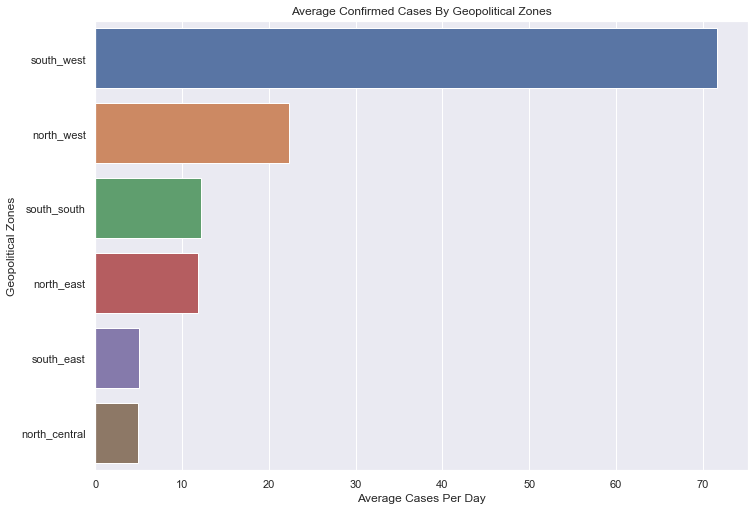

In [31]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
ax = sns.barplot(x='cases_zones', y='geopolitical_zones', data=average_zones_cases);
ax.set_title('Average Confirmed Cases By Geopolitical Zones')
ax.set_xlabel('Average Cases Per Day')
ax.set_ylabel('Geopolitical Zones')
plt.xticks(rotation=360)
plt.show()

### Monthly  Case Fatality Rate And Mortality Rate

In [32]:
month_fatality = exp_wip_col_clean[['dates', 'death', 'total_daily_cases', 'discharged_recovered']]

In [33]:
#set dates as index
month_fatality_index = month_fatality.set_index('dates')
month_fatality_index.head()

death  total_daily_cases  discharged_recovered
dates                                                              
2020-02-27 15:40:38      0                  1                     0
2020-02-28 01:00:36      0                  0                     0
2020-02-29 02:26:52      0                  0                     0
2020-03-01 22:44:08      0                  0                     0
2020-03-02 11:53:02      0                  0                     0

In [34]:
#group cases into months
month_fatality_index_group = month_fatality_index.resample('M').agg({'death': 'sum', 'total_daily_cases':'sum','discharged_recovered':'sum'}).reset_index()
month_fatality_index_group.head()

dates  death  total_daily_cases  discharged_recovered
0 2020-02-29      0                  1                     0
1 2020-03-31      2                137                     9
2 2020-04-30     56               1791                   310
3 2020-05-31    229               8240                  2688
4 2020-06-30    133               5924                  2213

In [35]:
#case fatality and mortality calculation
month_fatality_index_group['case_fatality'] = month_fatality_index_group['death'] / month_fatality_index_group['total_daily_cases']
month_fatality_index_group['mortality_rate'] = month_fatality_index_group['death']/1000
month_fatality_index_group['month'] = month_fatality_index_group['dates'].dt.month

In [36]:
month_fatality_index_group.head()

dates  death  total_daily_cases  discharged_recovered  case_fatality  \
0 2020-02-29      0                  1                     0       0.000000   
1 2020-03-31      2                137                     9       0.014599   
2 2020-04-30     56               1791                   310       0.031267   
3 2020-05-31    229               8240                  2688       0.027791   
4 2020-06-30    133               5924                  2213       0.022451   

   mortality_rate  month  
0           0.000      2  
1           0.002      3  
2           0.056      4  
3           0.229      5  
4           0.133      6

## Fatality Rate By Month

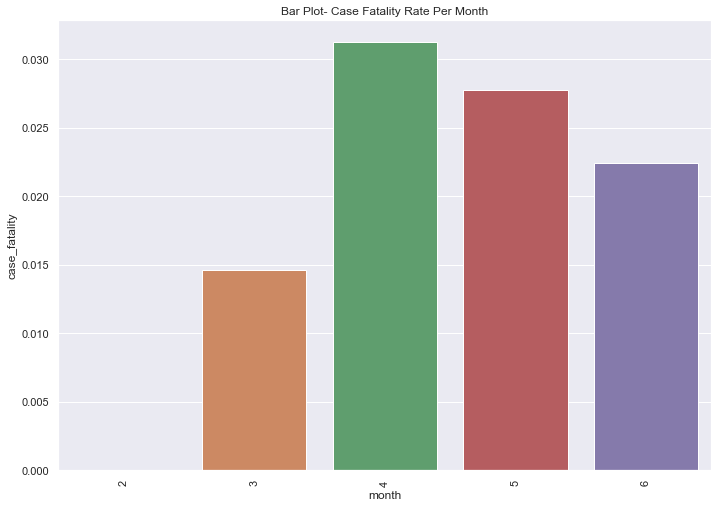

In [37]:
#visualize monthly fatality rate
sns.set(rc={'figure.figsize':(11.7,8.27)})
ax = sns.barplot(x='month', y='case_fatality', data=month_fatality_index_group)
ax.set_title('Bar Plot- Case Fatality Rate Per Month')
plt.xticks(rotation = 90)
plt.show()


## Mortality Rate By Month

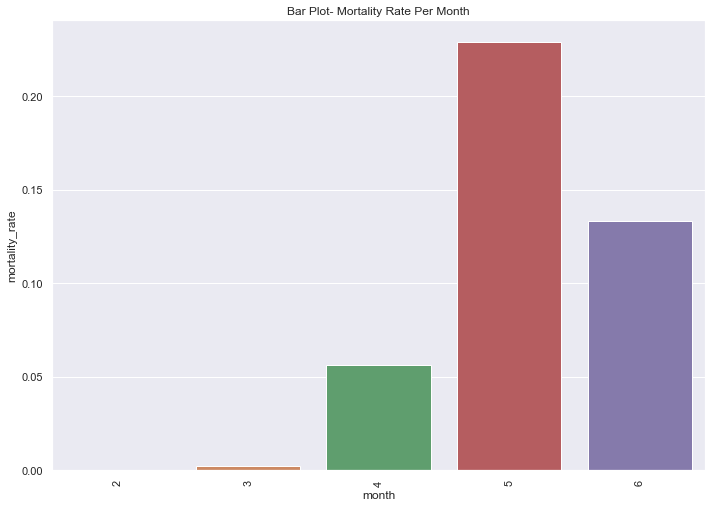

In [38]:
#visualize Mortality rate
sns.set(rc={'figure.figsize':(11.7,8.27)})
ax = sns.barplot(x='month', y='mortality_rate', data=month_fatality_index_group)
ax.set_title('Bar Plot- Mortality Rate Per Month')
plt.xticks(rotation = 90)
plt.show()


## Confirmed Cases By Month

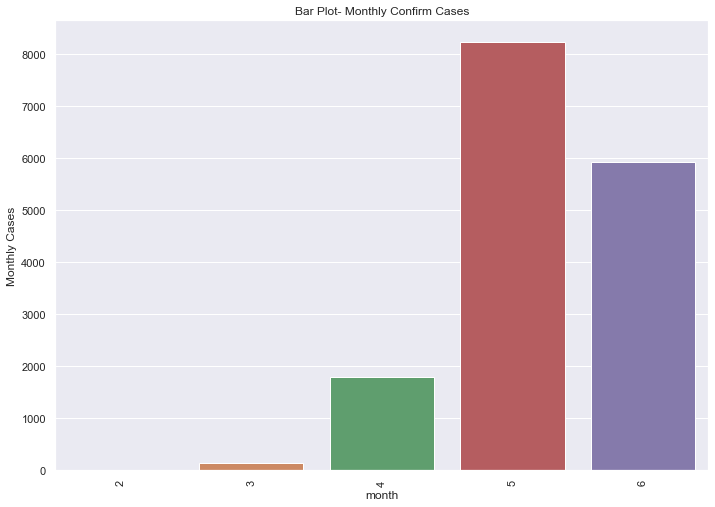

In [39]:
# Monthly confirmed cases
sns.set(rc={'figure.figsize':(11.7,8.27)})
ax = sns.barplot(x='month', y='total_daily_cases', data=month_fatality_index_group)
ax.set_title('Bar Plot- Monthly Confirm Cases')
ax.set_ylabel('Monthly Cases')
plt.xticks(rotation = 90)
plt.show()

## Deaths By Month

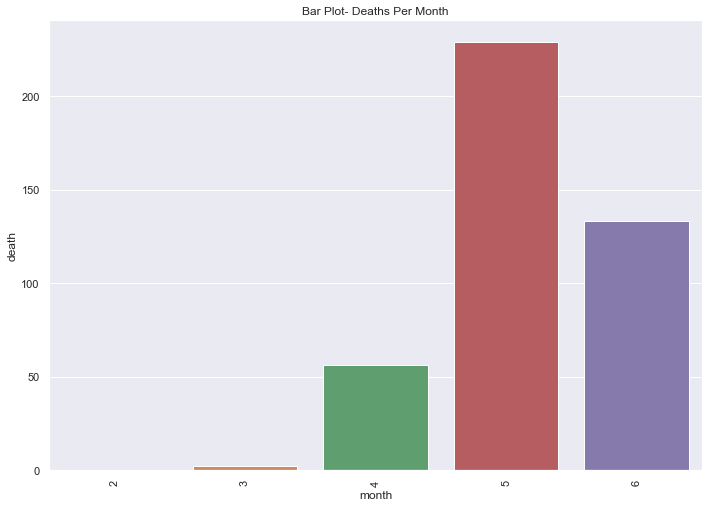

In [40]:
#Monthly Deaths
sns.set(rc={'figure.figsize':(11.7,8.27)})
ax = sns.barplot(x='month', y='death', data=month_fatality_index_group)
ax.set_title('Bar Plot- Deaths Per Month')
plt.xticks(rotation = 90)
plt.show()

## Recoveries By Month

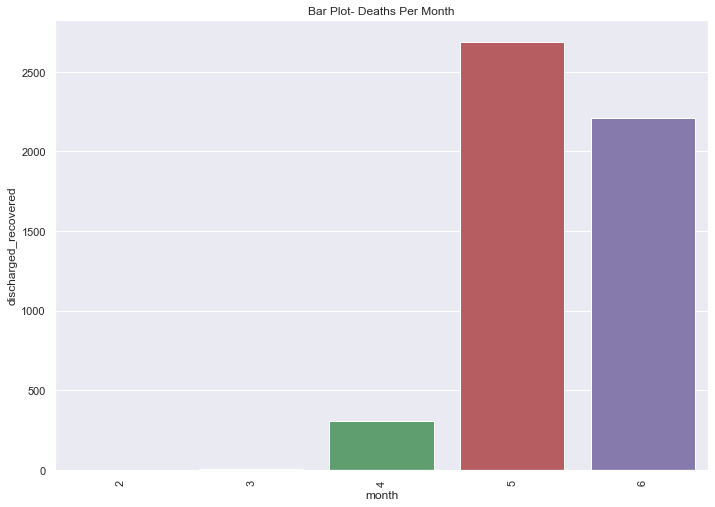

In [41]:
#Number of Recoveries by Month
sns.set(rc={'figure.figsize':(11.7,8.27)})
ax = sns.barplot(x='month', y='discharged_recovered', data=month_fatality_index_group)
ax.set_title('Bar Plot- Deaths Per Month')
plt.xticks(rotation = 90)
plt.show()

## Death By States

In [42]:
deathby_state.head()

States Affected No. of Cases (Lab Confirmed) No. of Cases (on admission)  \
0           Lagos                        6,840                       5,621   
1             FCT                        1,162                         821   
2            Kano                        1,049                         422   
3            Ogun                          544                         316   
4             Edo                          518                         365   

  No. Discharged  No. of Deaths  
0          1,137             82  
1            316             25  
2            577             50  
3            214             14  
4            128             25

In [43]:
deathby_state['No. of Cases (Lab Confirmed)'] = deathby_state['No. of Cases (Lab Confirmed)'].str.replace(',','')
deathby_state['No. of Cases (Lab Confirmed)'] = deathby_state['No. of Cases (Lab Confirmed)'].astype('int64')
deathby_state['No. Discharged'] = deathby_state['No. Discharged'].str.replace(',','')
deathby_state['No. Discharged'] = deathby_state['No. Discharged'].astype('int64')


In [44]:
state_stats = deathby_state.groupby('States Affected').agg({'No. Discharged':'max', 'No. of Deaths':'max','No. of Cases (Lab Confirmed)':'max'}).reset_index()
state_stats.head()

States Affected  No. Discharged  No. of Deaths  No. of Cases (Lab Confirmed)
0            Abia              16              0                           151
1         Adamawa              34              4                            42
2       Akwa Ibom              15              2                            45
3         Anambra              18              9                            53
4          Bauchi             230             10                           402

In [45]:
deaths_stats = state_stats[['States Affected','No. of Deaths']].sort_values('No. of Deaths', ascending=False)
deaths_stats.head()

States Affected  No. of Deaths
23           Lagos             82
18            Kano             50
7            Borno             26
10             Edo             25
13             FCT             25

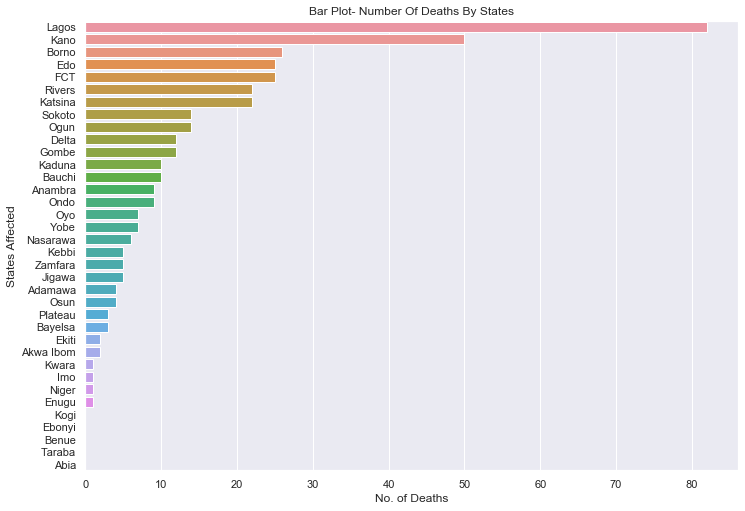

In [46]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
ax = sns.barplot(x='No. of Deaths', y='States Affected', data=deaths_stats)
ax.set_title('Bar Plot- Number Of Deaths By States')
#plt.yticks(rotation=90)
plt.show()

### Recoveries/Discharged By States

In [47]:
discharged_stats = state_stats[['No. Discharged', 'States Affected']].sort_values('No. Discharged',ascending=False)
discharged_stats.head()

No. Discharged States Affected
23            1137           Lagos
18             577            Kano
13             316             FCT
17             242          Kaduna
7              231           Borno

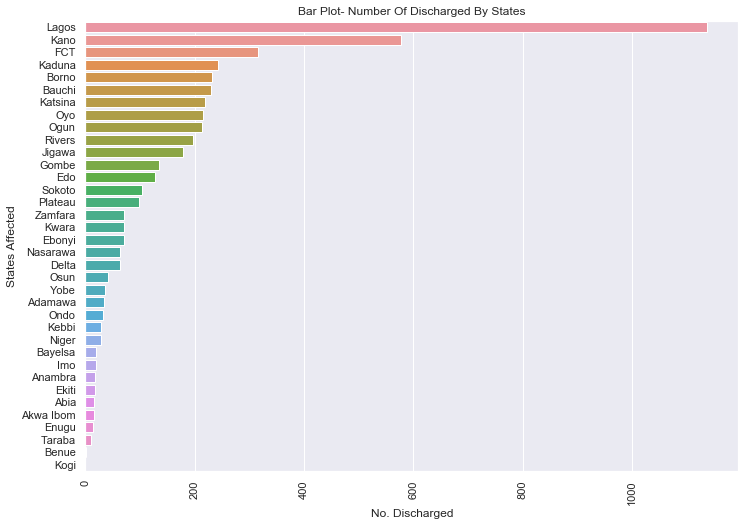

In [48]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
ax = sns.barplot(x='No. Discharged',y='States Affected', data=discharged_stats)
ax.set_title('Bar Plot- Number Of Discharged By States')
plt.xticks(rotation=90)
plt.show()

In [49]:
confirmed_cases_states = state_stats[['States Affected','No. of Cases (Lab Confirmed)']].sort_values('No. of Cases (Lab Confirmed)', ascending=False)
confirmed_cases_states.head()

States Affected  No. of Cases (Lab Confirmed)
23           Lagos                          6840
13             FCT                          1162
18            Kano                          1049
26            Ogun                           544
10             Edo                           518

### Confirmed Cases By States

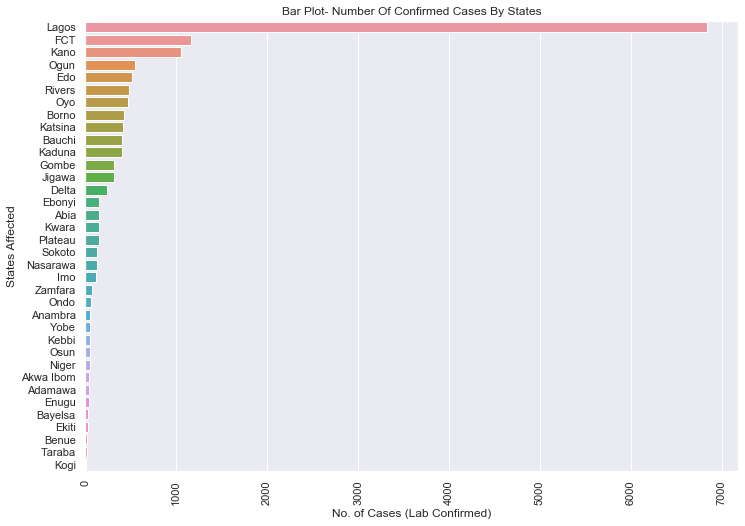

In [50]:
# Confirm cases spread across all states
sns.set(rc={'figure.figsize':(11.7,8.27)})
ax = sns.barplot(x='No. of Cases (Lab Confirmed)',y='States Affected', data=confirmed_cases_states)
ax.set_title('Bar Plot- Number Of Confirmed Cases By States')
plt.xticks(rotation=90)
plt.show()

### Predicting the Epidemic Situation of Covid19 In Nigeria with Logistic Mathematical Model
My choice of the Logistic Model is simply because it is simple and it conform to the statistical law of Epidemiology

In [51]:
#extract the data we need for building the Logistic Model
model_data = exp_wip_col_clean[['dates', 'death','total_daily_cases','discharged_recovered']]
model_data.head()

dates  death  total_daily_cases  discharged_recovered
0 2020-02-27 15:40:38      0                  1                     0
1 2020-02-28 01:00:36      0                  0                     0
2 2020-02-29 02:26:52      0                  0                     0
3 2020-03-01 22:44:08      0                  0                     0
4 2020-03-02 11:53:02      0                  0                     0

In [52]:
#create a cummulative sum columns
model_data['cum_daily_cases'] = model_data['total_daily_cases'].cumsum()
model_data['cum_daily_deaths'] = model_data['death'].cumsum()
model_data['cum_daily_discharged'] = model_data['discharged_recovered'].cumsum()


In [53]:
cum_data = model_data[['dates', 'cum_daily_cases', 'cum_daily_deaths','cum_daily_discharged']]
cum_data.head()

dates  cum_daily_cases  cum_daily_deaths  cum_daily_discharged
0 2020-02-27 15:40:38                1                 0                     0
1 2020-02-28 01:00:36                1                 0                     0
2 2020-02-29 02:26:52                1                 0                     0
3 2020-03-01 22:44:08                1                 0                     0
4 2020-03-02 11:53:02                1                 0                     0

In [54]:
cum_data.tail()

dates  cum_daily_cases  cum_daily_deaths  \
111 2020-06-10 15:52:49            13881               382   
112 2020-06-11 15:48:24            14562               387   
113 2020-06-12 15:44:03            15189               399   
114 2020-06-13 15:42:48            15690               407   
115 2020-06-14 15:43:41            16093               420   

     cum_daily_discharged  
111                  4351  
112                  4494  
113                  4891  
114                  5101  
115                  5220

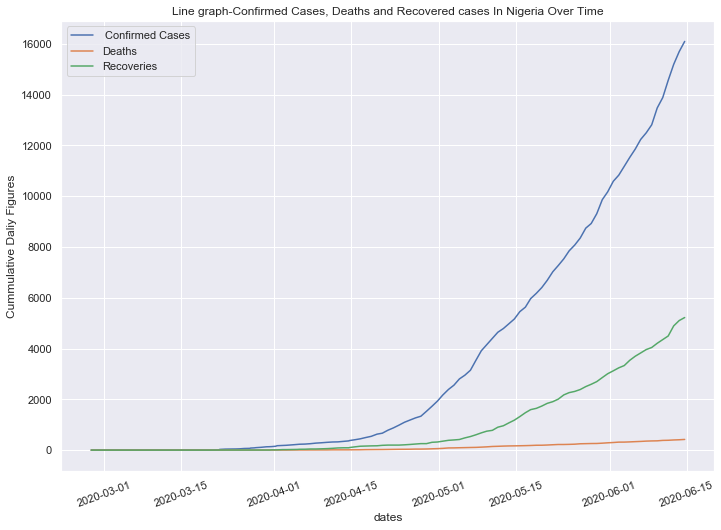

In [55]:
#Line graph of confirm cases over time
ax = sns.lineplot(x='dates', y='cum_daily_cases', data=cum_data, label=' Confirmed Cases')
ax = sns.lineplot(x='dates', y='cum_daily_deaths', data=cum_data,label='Deaths')
ax = sns.lineplot(x='dates', y='cum_daily_discharged', data=cum_data, label='Recoveries')
plt.xticks(rotation=20)
ax.set_title('Line graph-Confirmed Cases, Deaths and Recovered cases In Nigeria Over Time')
ax.set_ylabel('Cummulative Daliy Figures')
ax.legend()
plt.show()




## Build Logistic Model
The logistic model can be simply rendered as $\huge f(x;a,b,c)$ $\huge =$ $\huge \frac{c}{1 + e^-(x-b)/a}$ 

where :
- a = **Infection speed**
- b = **Day with maximum Infections Occured**
- c = **Total Number of people that would be infected at the end of the pandemic**

In [56]:
def logistic_model(x,a,b,c,d):
    return a / (1 + np.exp(-c * (x - d))) + b

# def logistics_noise(a,b,c,d,t):
#     return abs(c/(1+a*np.exp(-b*t))+np.random.normal(0,d))

In [57]:
model_data.head()

dates  death  total_daily_cases  discharged_recovered  \
0 2020-02-27 15:40:38      0                  1                     0   
1 2020-02-28 01:00:36      0                  0                     0   
2 2020-02-29 02:26:52      0                  0                     0   
3 2020-03-01 22:44:08      0                  0                     0   
4 2020-03-02 11:53:02      0                  0                     0   

   cum_daily_cases  cum_daily_deaths  cum_daily_discharged  
0                1                 0                     0  
1                1                 0                     0  
2                1                 0                     0  
3                1                 0                     0  
4                1                 0                     0

In [58]:
model_data['time_stamp'] = model_data.index
model_data.head()

dates  death  total_daily_cases  discharged_recovered  \
0 2020-02-27 15:40:38      0                  1                     0   
1 2020-02-28 01:00:36      0                  0                     0   
2 2020-02-29 02:26:52      0                  0                     0   
3 2020-03-01 22:44:08      0                  0                     0   
4 2020-03-02 11:53:02      0                  0                     0   

   cum_daily_cases  cum_daily_deaths  cum_daily_discharged  time_stamp  
0                1                 0                     0           0  
1                1                 0                     0           1  
2                1                 0                     0           2  
3                1                 0                     0           3  
4                1                 0                     0           4

In [59]:
# extract x(days) & y(cases) from dataframe
x = list(model_data.iloc[:,7])
y = list(model_data.iloc[:,4])


In [60]:
# randomly initialize a,b,c,d
p0 = np.random.exponential(size=4)
p0


array([0.30216562, 0.55587426, 0.25231325, 2.91765807])

In [61]:
# set upper and lower bounds a,b,c
bounds = (0,[100000.,1., 100000000., 100000.])
bounds

(0, [100000.0, 1.0, 100000000.0, 100000.0])

In [62]:
(a_, b_, c_,d_), cov = curve_fit(logistic_model,x,y,bounds=bounds, p0=p0)

In [63]:
a_,b_,c_,d_

(21335.01995226754,
 2.82849339625633e-15,
 0.07010260352794734,
 101.75674121878399)

In [64]:
#the time step at which the growth is fastest
# t_fastest = np.log(a) / b
# i_fastest = logistic_model(t_fastest, a, b, c)
# i_fastest

In [65]:
confirmed = np.array(y)
confirmed

array([    1,     1,     1,     1,     1,     1,     1,     1,     1,
           1,     1,     2,     2,     2,     2,     2,     2,     2,
           2,     3,     3,     3,     3,     6,    27,    39,    43,
          45,    50,    64,    69,    80,    88,    96,   110,   130,
         134,   138,   150,   173,   183,   189,   213,   223,   231,
         237,   253,   275,   289,   306,   319,   324,   344,   363,
         374,   408,   443,   494,   542,   628,   666,   783,   874,
         982,  1096,  1183,  1269,  1334,  1529,  1725,  1929,  2167,
        2387,  2557,  2802,  2950,  3145,  3526,  3912,  4151,  4399,
        4641,  4787,  4971,  5164,  5452,  5628,  5966,  6174,  6400,
        6684,  7023,  7268,  7533,  7846,  8075,  8351,  8740,  8922,
        9309,  9862, 10169, 10585, 10826, 11174, 11524, 11852, 12234,
       12494, 12809, 13472, 13881, 14562, 15189, 15690, 16093])

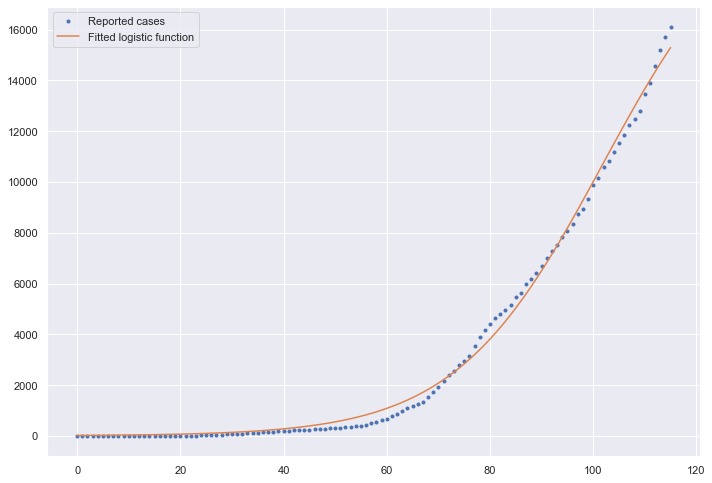

In [66]:
def plot_logistic_fit(confirmed, logistic_params):
    a_, b_, c_,d_ = logistic_params
    x = np.arange(0, len(model_data['time_stamp']))
    plt.plot(x, confirmed, ".", label="Reported cases")
    confirmed_pred = logistic_model(x, a_, b_, c_,d_)
    plt.plot(x, confirmed_pred, label="Fitted logistic function")
    plt.legend()
    plt.show()
    return confirmed_pred
confirmed_pred = plot_logistic_fit(confirmed, (a_, b_, c_,d_))


In [67]:
from sklearn.metrics import r2_score

In [68]:
#check Accuracy
r2_score(y,confirmed_pred)

0.9964544606541764

In [69]:
def plateau(confirmed, logistic_params, diff=20):
    a_, b_, c_, d_ = logistic_params 
    confirmed_now = confirmed[-1]
    confirmed_then = confirmed[-2]
    days = 0
    now = x[-1]
    while confirmed_now - confirmed_then > diff:
        days += 1
        confirmed_then = confirmed_now
        confirmed_now = logistic_model(now + days,a_,b_,c_,d_,)
    return days, confirmed_now
days, cases = plateau(confirmed,(a_,b_,c_,d_), diff=200)
print(f"In {days} days the number of infected people/cases will platau at {cases}")


In 1 days the number of infected people/cases will platau at 15590.811124296848


In [70]:
confirmed[-1] - confirmed[-2]

403

In [71]:
# diff = 200
# days, cases = plateau(y, (a_, b_, c_, d_),diff=diff)
# print(f"{days} days until growth is lower than {diff} per day")
# print(f"The total cases will be at {int(cases)}")

### Let see Exponential model
This is being considered because we are still at the early stage of the infection. That is the infection rate in still growing

In [72]:
#the first 60 days of the covid19 cases would be fitted to the exponential model
exp_model = model_data[['time_stamp', 'cum_daily_cases']]

In [73]:
#Apply log transformation to the number of infections
exp_model['log_cases'] = np.log(exp_model.iloc[:,1])

In [74]:
exp_model.head()

time_stamp  cum_daily_cases  log_cases
0           0                1        0.0
1           1                1        0.0
2           2                1        0.0
3           3                1        0.0
4           4                1        0.0

### Use Statsmodels's Linear Regression

In [75]:
X = exp_model['time_stamp'].to_list()
X = sm.add_constant(X)


In [76]:
y = np.array(exp_model.iloc[:,2])
y

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.69314718, 0.69314718, 0.69314718, 0.69314718,
       0.69314718, 0.69314718, 0.69314718, 0.69314718, 1.09861229,
       1.09861229, 1.09861229, 1.09861229, 1.79175947, 3.29583687,
       3.66356165, 3.76120012, 3.80666249, 3.91202301, 4.15888308,
       4.2341065 , 4.38202663, 4.47733681, 4.56434819, 4.70048037,
       4.86753445, 4.8978398 , 4.92725369, 5.01063529, 5.15329159,
       5.20948615, 5.24174702, 5.36129217, 5.40717177, 5.44241771,
       5.46806014, 5.53338949, 5.6167711 , 5.66642669, 5.7235851 ,
       5.7651911 , 5.78074352, 5.84064166, 5.89440283, 5.9242558 ,
       6.01126717, 6.09356977, 6.20253552, 6.295266  , 6.44254017,
       6.50128967, 6.6631327 , 6.77308038, 6.88959131, 6.99942247,
       7.07580886, 7.14598447, 7.19593723, 7.33236921, 7.45298233,
       7.56475701, 7.681099  , 7.77779263, 7.84658998, 7.93808

In [77]:
# model for just first 60 days of the virus
modey = sm.OLS(y,X)
result = modey.fit()


In [78]:
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.932
Model:                            OLS   Adj. R-squared:                  0.932
Method:                 Least Squares   F-statistic:                     1574.
Date:                Mon, 15 Jun 2020   Prob (F-statistic):           1.47e-68
Time:                        13:12:26   Log-Likelihood:                -142.62
No. Observations:                 116   AIC:                             289.2
Df Residuals:                     114   BIC:                             294.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5190      0.154      3.370      0.0

In [79]:
np.exp(0.5190), np.exp(0.0918)

(1.6803464627827445, 1.0961455710422354)

In [80]:
# Linear regression actual function
#y = np.exp(0.2995) * np.exp(0.0978) **t
def linear_pred(t):
    return np.exp(0.5190) * (np.exp(0.0918) ** t)

In [81]:
exp_model['predictions'] = exp_model['time_stamp'].apply(linear_pred)
exp_model.head()


time_stamp  cum_daily_cases  log_cases  predictions
0           0                1        0.0     1.680346
1           1                1        0.0     1.841904
2           2                1        0.0     2.018995
3           3                1        0.0     2.213113
4           4                1        0.0     2.425894

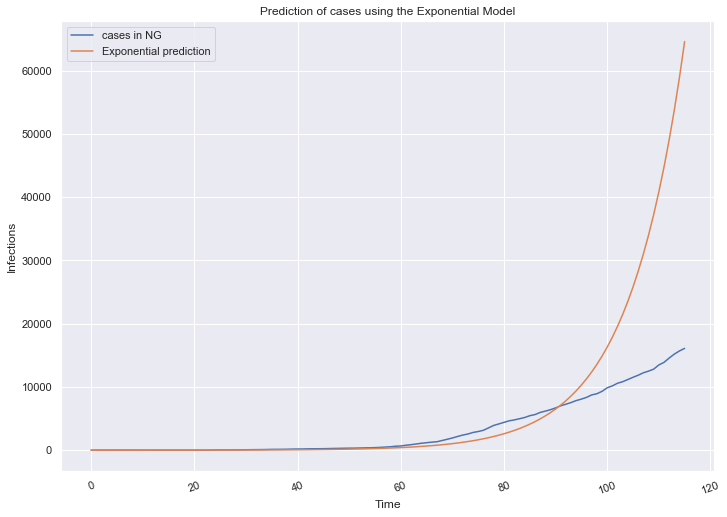

In [82]:
ax = sns.lineplot(x='time_stamp', y='cum_daily_cases', data=exp_model, label='cases in NG')
ax = sns.lineplot(x='time_stamp', y='predictions', data=exp_model,label='Exponential prediction')
plt.xticks(rotation=20)
ax.set_title('Prediction of cases using the Exponential Model')
ax.set_ylabel('Infections')
ax.set_xlabel('Time')
plt.legend()
plt.show()


### A race Bar Chart Vizualization

In [83]:
#get data into shape

race_bar = covid_ng.copy()
racebar_states = race_bar.drop(['Dealth', 'Dischared/Revovered', 'Cross River'], axis=1)
data_race_viz = racebar_states.set_index('Dates')
data_cleaned_race = data_race_viz.cumsum(axis=0)
data_cleaned_race.head()

Lagos  Abuja(FCT)  Kano  Ogun  Osun  Gombe  Katsina  \
Dates                                                                      
2020-02-27 15:40:38      1           0     0     0     0      0        0   
2020-02-28 01:00:36      1           0     0     0     0      0        0   
2020-02-29 02:26:52      1           0     0     0     0      0        0   
2020-03-01 22:44:08      1           0     0     0     0      0        0   
2020-03-02 11:53:02      1           0     0     0     0      0        0   

                     Borno  Edo  Oyo  Kwara  Akwa Ibom  Bauchi  Kaduna  Ekiti  \
Dates                                                                           
2020-02-27 15:40:38      0    0    0      0          0       0       0      0   
2020-02-28 01:00:36      0    0    0      0          0       0       0      0   
2020-02-29 02:26:52      0    0    0      0          0       0       0      0   
2020-03-01 22:44:08      0    0    0      0          0       0       0      0   
2020-03-02 11:53:02      0    0    0      0          0       0       0      0   

                     Ondo  Delta  Rivers  Jigawa  Enugu  Niger  Abia  Zamfara  \
Dates                                                                           
2020-02-27 15:40:38     0      0       0       0      0      0     0        0   
2020-02-28 01:00:36     0      0       0       0      0      0     0        0   
2020-02-29 02:26:52     0      0       0       0      0      0     0        0   
2020-03-01 22:44:08     0      0       0       0      0      0     0        0   
2020-03-02 11:53:02     0      0       0       0      0      0     0        0   

                     Sokoto  Benue  Anambra  Adamawa  Plateau  Imo  Kebbi  \
Dates                                                                       
2020-02-27 15:40:38       0      0        0        0        0    0      0   
2020-02-28 01:00:36       0      0        0        0        0    0      0   
2020-02-29 02:26:52       0      0        0        0        0    0      0   
2020-03-01 22:44:08       0      0        0        0        0    0      0   
2020-03-02 11:53:02       0      0        0        0        0    0      0   

                     Kogi  Nasarawa  Taraba  Yobe  Bayelsa  Ebonyi  
Dates                                                               
2020-02-27 15:40:38     0         0       0     0        0       0  
2020-02-28 01:00:36     0         0       0     0        0       0  
2020-02-29 02:26:52     0         0       0     0        0       0  
2020-03-01 22:44:08     0         0       0     0        0       0  
2020-03-02 11:53:02     0         0       0     0        0       0

In [84]:
import bar_chart_race as bcr


In [86]:
bcr.bar_chart_race(data_cleaned_race)